In [8]:
import pandas as pd
import numpy as np
import numpy_financial as npf

- pv (PV): present value (loan amount)
- stated_interest_rate (r): annual percentage rate (stated annual interest rate + any additional fees)
- periods (n): length of the loan in months
- pmt (P): monthly payment (assuming level payment)

<img src="annuity_formula_pv.PNG" width=500 height=300 />

img source: https://due.com/annuity/how-to-measure-your-annuity/

In [9]:
pv = 20000000 
stated_interest_rate = 0.05
monthly_interest_rate = stated_interest_rate / 12
periods = 240

pmt = npf.pmt(monthly_interest_rate, periods, pv * -1)
print("Monthly payment (rounded): " + str(round(pmt, 2)))

Monthly payment (rounded): 131991.15


In [10]:
def loan_pv(current_debt, pv_col = []):
    
    interest_pmt = current_debt * monthly_interest_rate
    capital_payment = pmt - interest_pmt
    remaining_debt = current_debt - capital_payment
    remaining_debt = remaining_debt

    if len(pv_col) > periods:
        return np.array(pv_col)
    pv_col.append((current_debt, capital_payment, interest_pmt))
    return loan_pv(remaining_debt, pv_col)

In [11]:
df = pd.DataFrame()
df.index.name = 'period_idx'
df[['pv', 'capital_pmt', 'interest_pmt']] = loan_pv(pv)
df['cum_capital_pmt'] = df['capital_pmt'].cumsum()
df['cum_interest_pmt'] = df['interest_pmt'].cumsum()
df = df.round(2)

In [12]:
display(df.head(10))
display(df.tail(10))

,pv,capital_pmt,interest_pmt,cum_capital_pmt,cum_interest_pmt
period_idx,,,,,
0,20000000.00,48657.81,83333.33,48657.81,83333.33
1,19951342.19,48860.56,83130.59,97518.37,166463.93
2,19902481.63,49064.14,82927.01,146582.51,249390.93
3,19853417.49,49268.57,82722.57,195851.09,332113.51
4,19804148.91,49473.86,82517.29,245324.95,414630.79
5,19754675.05,49680.00,82311.15,295004.95,496941.94
6,19704995.05,49887.00,82104.15,344891.95,579046.08
7,19655108.05,50094.86,81896.28,394986.81,660942.37
8,19605013.19,50303.59,81687.55,445290.41,742629.92


,pv,capital_pmt,interest_pmt,cum_capital_pmt,cum_interest_pmt
period_idx,,,,,
231,1163545.41,127143.04,4848.11,18963597.63,11658348.67
232,1036402.37,127672.80,4318.34,19091270.43,11662667.02
233,908729.57,128204.77,3786.37,19219475.21,11666453.39
234,780524.79,128738.96,3252.19,19348214.17,11669705.58
235,651785.83,129275.37,2715.77,19477489.54,11672421.35
236,522510.46,129814.02,2177.13,19607303.56,11674598.48
237,392696.44,130354.91,1636.24,19737658.48,11676234.71
238,262341.52,130898.06,1093.09,19868556.53,11677327.80
239,131443.47,131443.47,547.68,20000000.00,11677875.48


<AxesSubplot:xlabel='period_idx'>

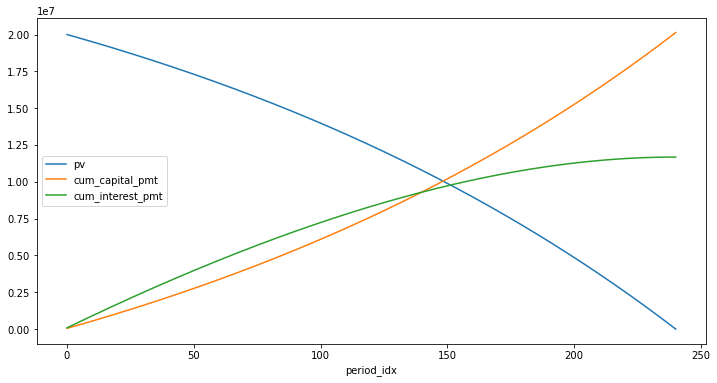

In [13]:
df[['pv', 'cum_capital_pmt', 'cum_interest_pmt']].plot(figsize=(12,6))

<AxesSubplot:xlabel='period_idx'>

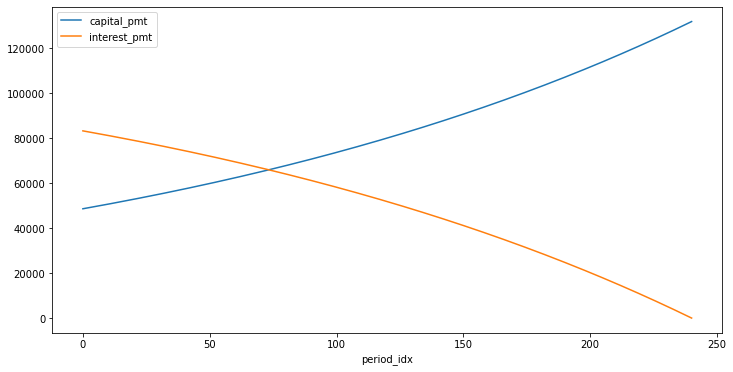

In [14]:
df[['capital_pmt', 'interest_pmt']].plot(figsize=(12,6))